In [1]:
using Distributed
addprocs(4)

4-element Array{Int64,1}:
 2
 3
 4
 5

In [2]:
@everywhere using DelimitedFiles
@everywhere using Revise, MDToolbox
ENV["COLUMNS"]=110; #display width for MDToolbox

┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /Users/yasu/.julia/packages/Revise/moD4B/src/packagedef.jl:1361


In [3]:
receptor=readpdb("6vsb_frame587.pdb")
ligand=readpdb("6waq_ligand.pdb")

1x970 TrjArray{Float64,Int64}
| A                          | A                          |  …   A                          |
| 1GLN                       | 1GLN                       |  …   115SER                     |
| 1N                         | 2CA                        |  …   970OG                      |
|    56.65    67.41   -36.24 |    55.68    67.77   -37.27 |  …      45.85    60.99     5.37 |

In [4]:
receptor =  MDToolbox.set_radius(receptor)
ligand = MDToolbox.set_radius(ligand)

1x970 TrjArray{Float64,Int64}
| A                          | A                          |  …   A                          |
| 1GLN                       | 1GLN                       |  …   115SER                     |
| 1N                         | 2CA                        |  …   970OG                      |
|    56.65    67.41   -36.24 |    55.68    67.77   -37.27 |  …      45.85    60.99     5.37 |

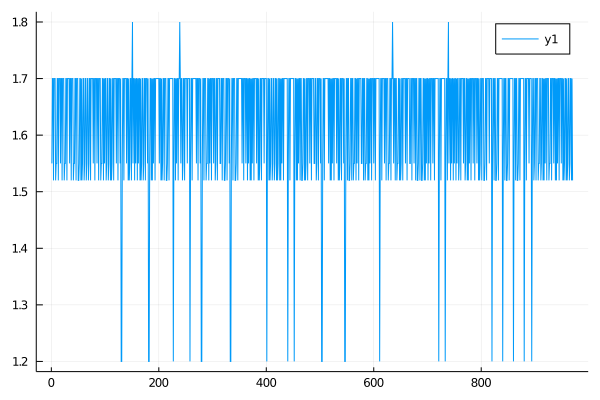

In [5]:
using Plots
plot(ligand.radius)

In [6]:
receptor = MDToolbox.compute_sasa(receptor, 1.4)
ligand = MDToolbox.compute_sasa(ligand, 1.4)

1x970 TrjArray{Float64,Int64}
| A                          | A                          |  …   A                          |
| 1GLN                       | 1GLN                       |  …   115SER                     |
| 1N                         | 2CA                        |  …   970OG                      |
|    56.65    67.41   -36.24 |    55.68    67.77   -37.27 |  …      45.85    60.99     5.37 |

In [7]:
receptor2 = TrjArray(receptor, charge=receptor.sasa)
writepdb("test.pdb", receptor2)

In [8]:
quaternions = readdlm("../data/quaternion/QUATERNION_LIST_576_Orient");
#quaternions = readdlm("../data/quaternion/QUATERNION_LIST_4608_Orient");
#quaternions = readdlm("../data/quaternion/QUATERNION_LIST_36864_Orient");
quaternions = quaternions[1:10, :]
size(quaternions)
#quaternions = quaternions[1:1000, :]

(10, 4)

In [9]:
grid_space = 1.2

1.2

In [10]:
@time result = MDToolbox.dock_fft(receptor, ligand, quaternions, grid_space=grid_space, tops=100)

Progress: 100%|█████████████████████████████████████████| Time: 0:03:07


199.525986 seconds (279.24 M allocations: 7.191 GiB, 0.58% gc time)


(receptor = 1x32922 TrjArray{Float64,Int64}
| P                          | P                          |  …   C                          |
| 1MET                       | 1MET                       |  …   8AFUC                      |
| 1N                         | 2CA                        |  …   32922C6                    |
|   -34.63    60.09    50.34 |   -35.66    59.92    51.42 |  …      15.99   -24.62    32.65 |, ligand = 100x970 TrjArray{Float64,Int64}
| A                          | A                          |  …   A                          |
| 1GLN                       | 1GLN                       |  …   115SER                     |
| 1N                         | 2CA                        |  …   970OG                      |
|   -49.54    47.89    29.11 |   -49.81    49.21    28.56 |  …     -19.89    20.89    12.31 |
|   -49.54    47.89    27.91 |   -49.81    49.21    27.36 |        -19.89    20.89    11.11 |
|   -49.54    47.89    30.31 |   -49.81    49.21    29.76 |        -

In [11]:
result.score

100-element Array{Float64,1}:
 643.999999999969
 642.9999999999654
 637.9999999999634
 633.9999999999893
 616.9999999999766
 616.9999999999741
 609.9999999999776
 608.9999999999792
 607.9999999999701
 604.0000000000064
 603.9999999999819
 597.9999999999766
 593.9999999999939
   ⋮
 490.99999999997596
 490.99999999997385
 490.9999999999622
 489.9999999999802
 489.9999999999688
 489.999999999965
 488.99999999999307
 488.99999999999136
 488.99999999996635
 488.99999999996277
 487.9999999999805
 487.99999999996703

In [12]:
result.ligand

100x970 TrjArray{Float64,Int64}
| A                          | A                          |  …   A                          |
| 1GLN                       | 1GLN                       |  …   115SER                     |
| 1N                         | 2CA                        |  …   970OG                      |
|   -49.54    47.89    29.11 |   -49.81    49.21    28.56 |  …     -19.89    20.89    12.31 |
|   -49.54    47.89    27.91 |   -49.81    49.21    27.36 |        -19.89    20.89    11.11 |
|   -49.54    47.89    30.31 |   -49.81    49.21    29.76 |        -19.89    20.89    13.51 |
|    51.82   -26.41   -29.69 |    52.72   -27.42   -30.24 |         12.65   -17.86   -46.49 |
|   -50.74    47.89    29.11 |   -51.01    49.21    28.56 |        -21.09    20.89    12.31 |
|   -49.54    47.89    31.51 |   -49.81    49.21    30.96 |  …     -19.89    20.89    14.71 |
|   -49.54    46.69    27.91 |   -49.81    48.01    27.36 |        -19.89    19.69    11.11 |
|    35.89    41.14   -28.49

In [13]:
writepdb("result_receptor.pdb", result.receptor)
writepdb("result_ligand.pdb", result.ligand)

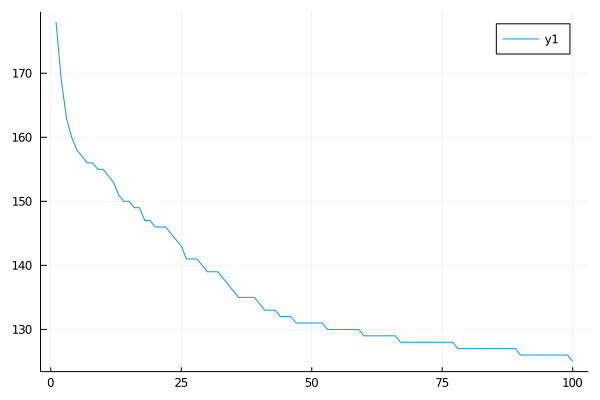

In [43]:
using Plots
plot(result.score)